In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
zoo = fetch_ucirepo(id=111)
X = zoo.data.features  # Feature set
y = zoo.data.targets.values.ravel()  # Targets

# Print dataset metadata and variable information
print(zoo.metadata)
print(zoo.variables)


{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [9]:
n_clusters = len(pd.unique(y))

# K-Modes clustering
km = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)
km_clusters = km.fit_predict(X)

# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X)

# Calculate performance metrics
km_ari = adjusted_rand_score(y, km_clusters)
km_nmi = normalized_mutual_info_score(y, km_clusters)
km_fmi = fowlkes_mallows_score(y, km_clusters)
hc_ari = adjusted_rand_score(y, hc_clusters)
hc_nmi = normalized_mutual_info_score(y, hc_clusters)
hc_fmi = fowlkes_mallows_score(y, hc_clusters)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18, cost: 169.0
Run 1, iteration: 2/100, moves: 10, cost: 156.0
Run 1, iteration: 3/100, moves: 4, cost: 155.0
Run 1, iteration: 4/100, moves: 0, cost: 155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 25, cost: 162.0
Run 2, iteration: 2/100, moves: 1, cost: 162.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6, cost: 170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18, cost: 154.0
Run 4, iteration: 2/100, moves: 0, cost: 154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 27, cost: 165.0
Run 5, iteration: 2/100, moves: 4, cost: 165.0
Best run was number 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
print("\nK-Modes Clustering Metrics:")
print("Adjusted Rand Index:", km_ari)
print("Normalized Mutual Information:", km_nmi)
print("Folkes-Mallows Index:", km_fmi)

print("\nHierarchical Clustering Metrics:")
print("Adjusted Rand Index:", hc_ari)
print("Normalized Mutual Information:", hc_nmi)
print("Folkes-Mallows Index:", hc_fmi)



K-Modes Clustering Metrics:
Adjusted Rand Index: 0.5495442612990641
Normalized Mutual Information: 0.7394375268913416
Folkes-Mallows Index: 0.6460645320566003

Hierarchical Clustering Metrics:
Adjusted Rand Index: 0.695825088191842
Normalized Mutual Information: 0.793478800734091
Folkes-Mallows Index: 0.7641075110572974


In [11]:
# Dimensionality reduction with PCA for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


<ipython-input-12-ca5267d82d23>:3: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=km_clusters, palette='viridis', style=y, markers='o')


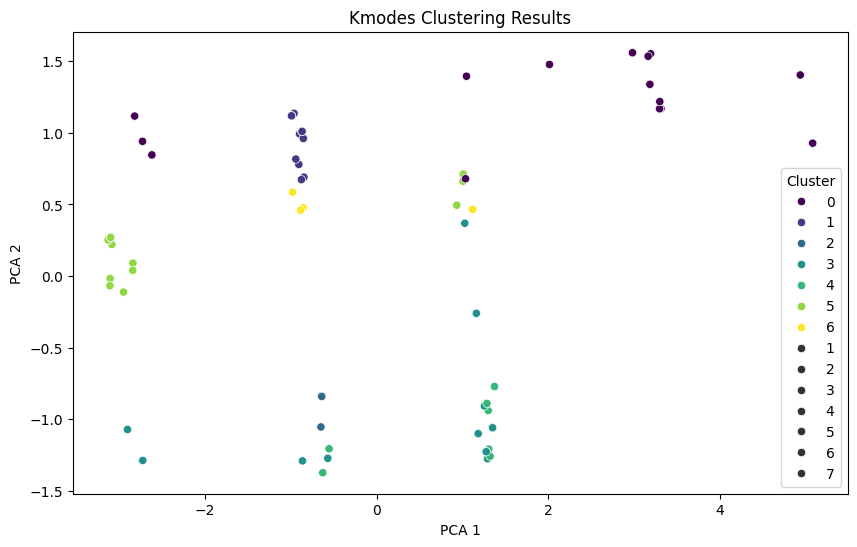

In [12]:
# Scatter plot for K-Modes Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=km_clusters, palette='viridis', style=y, markers='o')
plt.title('Kmodes Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

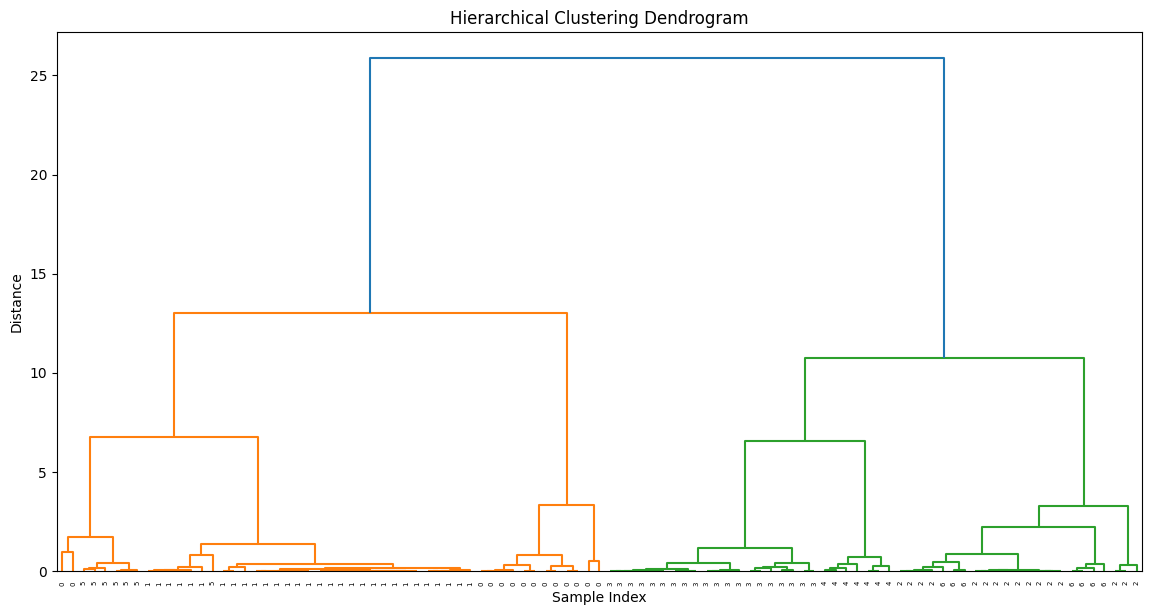

In [13]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(14, 7))
linked = linkage(X_pca, method='ward')
dendrogram(linked, orientation='top', labels=hc_clusters, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
